# Prediction of Mental Health Treatment in Tech Industry

## 1 Background, Motivation, & Business Question

In today's fast-paced tech industry, the mental well-being of employees is critical. We're here to provide solutions to address the issue. As an HR consultancy with a focus on mental health, we serve tech companies across North America. We utilize comprehensive data from “Mental Health in Tech Survey” to build tools that can identify the signs when employees might be struggling with their mental health, particularly when it's affecting their work and well-being.

Our approach involves machine learning models. These models are designed to identify key predictors of mental health challenges, such as the extent of work interference caused by mental health issues, the availability of employer-provided mental health benefits, employee awareness of mental health care options, and etc, to identify employees who may be silently enduring hardships. Our insights are invaluable for tech companies aiming to customize their Mental Wellness Programs. It's about reaching the employees who are adversely affected by mental health issues without seeking help.

By proactively initiating and continuously refining a Mental Wellness Program, a company does more than aid its employees; it lays the groundwork for a thriving business environment. This strategy leads to improved employee performance, heightened job satisfaction, better retention rates, and a deeper commitment to the company. 


## 2 Exploratory Data Analysis (EDA)

### 2.1 Import Packages (including all the packages used in the following sections)

In [3]:
#basic imports
import pandas as pd
import numpy as np

#preprocessing imports
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
#model imports
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#model selection imports
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#other imports
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import altair as alt
import os
import sys
import seaborn as sns
sys.path.append(os.path.join(os.path.abspath("."), "code"))

### 2.2 Load the Data and Split

In [4]:
df = pd.read_csv("survey.csv", index_col=0)
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
Timestamp,,,,,,,,,,,,,,,,,,,,,
2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

### 2.3 Describe Data
There are in total 1,259 rows and 26 columns in the loaded datasets. For the training set, their are 1007 rows.  Each row of the data records a survey respond of an individual in the technical industry. The columns inludes infomation about the individual's personal attributes and survey responds. Most of the columns' data types are object (categorical values).   
As described above, we will use the column "treatment" as our target value in the prediction model.

In [6]:
df.shape

(1259, 26)

In [7]:
train_df.shape

(1007, 26)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1007 entries, 2014-09-20 13:51:05 to 2014-08-30 19:56:23
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1007 non-null   int64 
 1   Gender                     1007 non-null   object
 2   Country                    1007 non-null   object
 3   state                      587 non-null    object
 4   self_employed              991 non-null    object
 5   family_history             1007 non-null   object
 6   treatment                  1007 non-null   object
 7   work_interfere             800 non-null    object
 8   no_employees               1007 non-null   object
 9   remote_work                1007 non-null   object
 10  tech_company               1007 non-null   object
 11  benefits                   1007 non-null   object
 12  care_options               1007 non-null   object
 13  wellness_program           1007 non

In our dataset, 'Age' is the only numeric feature which will be discussed in later part; the others are categorical features. 

As 'treatment' is categorical, We will use classification method in analysis.

We then checked the summary statistics of each feature and the unique values of each column.

In [9]:
train_df.describe(include=['object', 'category'])

,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1007,1007,587,991,1007,1007,800,1007,1007,1007,...,1007,1007,1007,1007,1007,1007,1007,1007,1007,127
unique,43,44,44,2,2,2,4,6,2,2,...,5,3,3,3,3,3,3,3,2,124
top,Male,United States,CA,No,No,Yes,Sometimes,26-100,No,Yes,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,492,593,114,876,613,508,372,237,709,831,...,455,393,735,619,423,804,445,451,855,4


In [10]:
from IPython.display import HTML 

HTML(
    train_df
    .select_dtypes(object)
    .drop(columns=['comments']) 
    .apply(lambda x: sorted(pd.unique(x.astype(str))))
    .to_frame()
    .to_html()
)


,0
Gender,"[A little about you, Agender, All, Androgyne, Cis Male, Cis Man, Enby, F, Femake, Female, Female , Female (cis), Genderqueer, Guy (-ish) ^_^, M, Mail, Make, Mal, Male, Male , Male (CIS), Male-ish, Malr, Man, Neuter, Trans woman, Woman, cis male, f, femail, female, fluid, m, maile, male, male leaning androgynous, msle, non-binary, ostensibly male, unsure what that really means, p, queer, something kinda male?, woman]"
Country,"[Australia, Austria, Bahamas, The, Belgium, Bosnia and Herzegovina, Brazil, Bulgaria, Canada, China, Colombia, Costa Rica, Croatia, Czech Republic, Denmark, Finland, France, Georgia, Germany, Greece, Hungary, India, Ireland, Israel, Italy, Japan, Mexico, Moldova, Netherlands, New Zealand, Nigeria, Norway, Philippines, Poland, Portugal, Russia, Singapore, South Africa, Sweden, Switzerland, Thailand, United Kingdom, United States, Uruguay, Zimbabwe]"
state,"[AL, AZ, CA, CO, CT, DC, FL, GA, IA, ID, IL, IN, KS, KY, MA, MD, ME, MI, MN, MO, MS, NC, NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, RI, SC, SD, TN, TX, UT, VA, VT, WA, WI, WV, WY, nan]"
self_employed,"[No, Yes, nan]"
family_history,"[No, Yes]"
treatment,"[No, Yes]"
work_interfere,"[Never, Often, Rarely, Sometimes, nan]"
no_employees,"[1-5, 100-500, 26-100, 500-1000, 6-25, More than 1000]"
remote_work,"[No, Yes]"
tech_company,"[No, Yes]"


The following step is to find out the missing value.

In [11]:
train_df.isnull().sum()

Age                            0
Gender                         0
Country                        0
state                        420
self_employed                 16
family_history                 0
treatment                      0
work_interfere               207
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     880
dtype: int64

In [12]:
total_entries = len(train_df)
percent_missing = train_df.isnull().sum() * 100 / total_entries
missing_value_df = pd.DataFrame({'Feature': percent_missing.index, 
                                 'Percentage': percent_missing.values})
missing_value_df = missing_value_df[missing_value_df['Percentage'] > 0]
missing_value_df['Percentage'] = missing_value_df['Percentage'].apply(lambda x: '{:.2f}%'.format(x))
missing_value_df = missing_value_df.sort_values(by='Percentage', ascending=False)
print(missing_value_df)

           Feature Percentage
25        comments     87.39%
3            state     41.71%
7   work_interfere     20.56%
4    self_employed      1.59%


Since the 'comments' and 'state' have a large percentage of missing values, we will exclude them from the model building process, and preprocess work_interfere and self_employed.

### 2.4 Discussion on Treatment

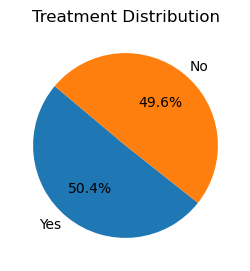

In [13]:
treatment_counts = train_df['treatment'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Treatment Distribution')
plt.show()

The distribution of 'Yes' and 'No' is equal in the dataset, showing we have balanced dataset.

### 2.5 Discussion on Country and State

In [14]:
train_df.Country.value_counts().head(10)

Country
United States     593
United Kingdom    149
Canada             55
Germany            41
Netherlands        23
Ireland            22
Australia          18
France             11
New Zealand         8
Switzerland         6
Name: count, dtype: int64

In [15]:
train_df[train_df['Country'] == 'United States']['state'].value_counts().head()

state
CA    114
WA     57
NY     42
TN     37
TX     34
Name: count, dtype: int64

In [16]:
train_df = train_df[(train_df['Country'] == 'United States') | (train_df['Country'] == 'Canada') | (train_df['Country'] == 'United Kingdom')]
test_df = test_df[(test_df['Country'] == 'United States') | (test_df['Country'] == 'Canada') | (train_df['Country'] == 'United Kingdom')]

The countries with the most representation are the United States, the United Kingdom, and Canada. 

Therefore, we have chosen to focus on the United States, the United Kingdom, and Canada for our discussion. This decision is based on the shared cultural similarities across English-Speaking countries, also allowing us to retain the broadest scope of our data.

The state column is specific to the United States and, given that it only encompasses five states, its representativeness is limited. This further supports the decision to omit it.

### 2.6 Discussion on Gender

In [17]:
train_df.Gender.unique()

array(['Female', 'Male', 'M', 'f', 'female', 'male', 'Make', 'm', 'F',
       'Cis Male', 'male leaning androgynous', 'p', 'Neuter', 'msle',
       'Agender', 'Male-ish', 'Cis Man', 'maile', 'Female ',
       'Trans woman', 'ostensibly male, unsure what that really means',
       'Male ', 'woman', 'non-binary', 'Woman', 'Female (cis)', 'Man',
       'cis male', 'Guy (-ish) ^_^', 'Male (CIS)', 'femail', 'Enby',
       'Mail', 'Androgyne', 'Femake', 'Genderqueer'], dtype=object)

Observing the variety of responses provided for gender, we cleaned our data using the following function to ensure consistency in further analysis.

In [18]:
def unify_gender(gender):
    gender = gender.lower() 
    if 'trans' in gender:
        return 'Trans'
    elif 'woman' in gender or 'fem' in gender:
        return 'CIS female'
    elif 'male' in gender or 'man' in gender:
        return 'CIS male'
    else:
        return 'Other'  
        
train_df['Gender'] = train_df['Gender'].apply(unify_gender)
test_df['Gender'] = test_df['Gender'].apply(unify_gender)
print(train_df['Gender'].value_counts()) 

Gender
CIS male      503
Other         158
CIS female    135
Trans           1
Name: count, dtype: int64


Reflecting on the gender distribution, males constitute the predominant percentage.

While incorporating gender into specific machine learning procedures can lead to bias, our findings indicate that, in our scenario, workplace gender differences contribute to certain mental health issues, as evidenced by research.

### 2.7 Discussion on Age

Upon examining the age data, we identified certain implausible values, including ages below 18 (the legal working age) and those above 70 (retirement age). 

Consequently, we removed these outliers from the dataset. 


In [19]:
train_df[(train_df['Age'] >= 18) & (train_df['Age'] <= 70)]

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
Timestamp,,,,,,,,,,,,,,,,,,,,,
2014-09-20 13:51:05,26,CIS female,United States,MI,No,Yes,Yes,Rarely,100-500,No,...,Don't know,Maybe,Maybe,No,No,No,Maybe,No,No,NaN
2014-08-27 11:38:55,31,CIS male,United States,PA,Yes,Yes,No,Rarely,1-5,Yes,...,Somewhat difficult,Yes,No,No,No,No,No,No,Yes,NaN
2014-08-27 13:35:23,40,Other,United States,OH,No,No,Yes,Sometimes,More than 1000,Yes,...,Don't know,Yes,Maybe,No,No,No,Maybe,No,Yes,I have only discussed my mental illness with c...
2015-05-05 14:22:18,43,Other,United States,FL,No,Yes,Yes,Rarely,More than 1000,Yes,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
2014-08-29 09:10:08,23,CIS male,United States,PA,No,Yes,No,Sometimes,26-100,No,...,Somewhat easy,No,No,No,No,No,Maybe,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-02 15:47:43,28,CIS male,United States,TN,No,Yes,Yes,Often,More than 1000,No,...,Somewhat easy,Yes,Maybe,Some of them,Yes,No,No,No,Yes,NaN
2014-09-01 21:03:25,39,Other,United Kingdom,NaN,No,Yes,Yes,Sometimes,More than 1000,No,...,Very easy,Maybe,Maybe,Some of them,Yes,Maybe,Maybe,Yes,No,Despite the impression that several 'no' respo...
2014-08-27 12:23:59,35,Other,United States,OR,No,Yes,Yes,Sometimes,26-100,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,No,No,I've seen negative consequences towards mental...


In [20]:
train_df = train_df[(train_df['Age'] >= 18) & (train_df['Age'] <= 70)]
test_df = test_df[(test_df['Age'] >= 18) & (test_df['Age'] <= 70)]

After analyzing the age distribution, we discovered that the majority of individuals fall within the 25-40 age range.

### 2.8 Discussion on Company Related Features

In the previous step we discovered that there is a feature tech_company, indicating that the data might include survey data from non-tech companies' employees. Thus, we applied the following filter to guaruntee the accuracy of the data, and would remove this feature before modelling.

In [21]:
train_df = train_df[(train_df['tech_company']=='Yes')]
test_df = test_df[(test_df['tech_company']=='Yes')]

## 3 Preprocessing

### 3.1 Separating features and targets
After all the data cleansing, we could now split the training sets and test sets into target values (“treatment”) and features. Meanwhile, we dropped the features that we think are not appropriate to include as discussed in EDA, including “country”, “comments”, “stats”, and “tech_company”.

In [22]:
X_train = train_df.drop(columns=["Country", "treatment", "comments","state","tech_company"])
y_train = train_df["treatment"]

X_test = test_df.drop(columns=["Country","treatment", "comments","state","tech_company"])
y_test = test_df["treatment"]

### 3.2 Building ColumnTransformer
We separated the features by their data types to go through different transformations. For the numeric features, we used SimpleImputer to fill the NaN values with the median of the feature, then used  StandardScaler to implement scaling transformation; For the categorical features, we conducted imputation by fill in the missing values with “missing” and applied OneHotEncoder to encode categorical values. To prevent new categorical values appearing in the test set and causing errors, we set the parameter “handle_unknown” to "ignore". Additionally, in EDA we knew that some of the categorical features are binary, so we used the drop = "if_binary" parameter. Finally, we built a ColumnTransformer to combine  different routes for transformations.

In [23]:
# separate numerical and categorical features
numeric_features = X_train.select_dtypes('number').columns.to_list()
categorical_features = X_train.select_dtypes('object').columns.to_list()

In [24]:
#create numeric_transformer
numeric_transformer = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy="median"),
    StandardScaler()
)
#create categorical_transformer
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown ="ignore", drop="if_binary")
)
#build column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, numeric_features),
        ("categorical", categorical_transformer, categorical_features)
        
    ],
    remainder='passthrough'
)


### 3.3 Model pipelines
We first built a dummy model as a baseline. Then we explored various models that have been covered in our learning curriculum, applying them to the dataset. To deepen our understanding and application of machine learning techniques, we integrated the random forrest model into our project. We made a pipeline for each model we used, incorporating the preprocessor we built above to process the input data. 
Given that our target variables are both categorical and binary, we employed classifier models in this process.

In [25]:
#Dummy model
dm_pipeline = make_pipeline(
    preprocessor,
    DummyClassifier(strategy = "most_frequent")
)


#DecisionTree
dt_pipeline = make_pipeline(
    preprocessor,
    DecisionTreeClassifier()
)


#SVN
from sklearn.svm import SVC
svm_pipeline = make_pipeline(
    preprocessor,
    SVC()
)

#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr_pipeline = make_pipeline(
    preprocessor,
    LogisticRegression()
)

#RandomForest
from sklearn.ensemble import RandomForestClassifier
rf_pipeline = make_pipeline(
    preprocessor,
    RandomForestClassifier()
)

## 4 Model Evaluation and Hyperparameter Tuning
At this stage, we first used cross-validation to have a glance of the accuracy of training set and test set. We will conduct hyperparameter tuning to improve the performance of accuracy.
Since the size of our datasets is relatively smaller, we used grid search to find the best hyperparameters and set all the cross-validation fold numbers to 5.

Just for convenience, we built a function to quick print out both the training score and test score of cross-validation

In [26]:
def print_scores(sc1, sc2):
    print(f"Train score: {sc1:.2f}")
    print(f"Test score: {sc2:.2f}")

### Dummy model
The baseline accuracy is 0.514.

In [27]:
scores = cross_validate(dm_pipeline, X_train, y_train, cv=5, return_train_score=True)
scores_df = pd.DataFrame(scores)
# mean score
pd.DataFrame(scores).mean()

fit_time       0.022793
score_time     0.009670
test_score     0.523365
train_score    0.523365
dtype: float64

### Decision Tree Model
For the best estimator we found, the max_depth is 2 and the min_samples_leaf is 10 for the decision tree model.   
The highest accurcacy score on test set is 0.78.

In [28]:
scores = cross_validate(dt_pipeline, X_train, y_train, cv=5, return_train_score=True)
scores_df = pd.DataFrame(scores)
pd.DataFrame(scores).mean()

fit_time       0.021249
score_time     0.008823
test_score     0.753949
train_score    1.000000
dtype: float64

In [29]:
# Hyperparameter tuning
param_grid = {
    'decisiontreeclassifier__min_samples_leaf': range(0, 100, 10), 
    'decisiontreeclassifier__max_depth': range(0, 10, 2)
}

grid_search1 = GridSearchCV(dt_pipeline, param_grid, verbose=1, cv=5)# n_jobs= -1 ,

grid_search1.fit(X_train, y_train)
print(grid_search1.best_params_)
print_scores(grid_search1.score(X_train, y_train), grid_search1.score(X_test, y_test))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'decisiontreeclassifier__max_depth': 2, 'decisiontreeclassifier__min_samples_leaf': 10}
Train score: 0.85
Test score: 0.80


### SVM Model
For the best estimator we found, the C is 1 and the gamma is 0.1 for the SVM model.   
The highest accurcacy score on test set is 0.79.

In [30]:
scores = cross_validate(svm_pipeline, X_train, y_train, cv=5, return_train_score=True)
scores_df = pd.DataFrame(scores)
pd.DataFrame(scores).mean()

fit_time       0.042357
score_time     0.017518
test_score     0.845761
train_score    0.886687
dtype: float64

In [31]:
param_grid = {
    "svc__gamma": [0.1, 1.0, 10, 100],
    "svc__C": [0.1, 1.0, 10, 100]
}

grid_search2 = GridSearchCV(svm_pipeline, param_grid, verbose=1, cv=5)# n_jobs= -1 ,

grid_search2.fit(X_train, y_train)
print(grid_search2.best_params_)
print_scores(grid_search2.score(X_train, y_train), grid_search2.score(X_test, y_test))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'svc__C': 1.0, 'svc__gamma': 0.1}
Train score: 0.91
Test score: 0.80


### Logistic Regression Model
For the best estimator we found, the C is 30 for the Logistic Regression model.   
The highest accurcacy score on test set is 0.81.

In [32]:
scores = cross_validate(lr_pipeline, X_train, y_train, cv=5, return_train_score=True)
scores_df = pd.DataFrame(scores)
pd.DataFrame(scores).mean()

fit_time       0.030921
score_time     0.008718
test_score     0.833345
train_score    0.865263
dtype: float64

In [33]:
param_grid = {
    "logisticregression__C": range(0, 100, 10)
}

grid_search3 = GridSearchCV(lr_pipeline, param_grid, verbose=1, cv=5)# n_jobs= -1 ,

grid_search3.fit(X_train, y_train)
print(grid_search3.best_params_)
print_scores(grid_search3.score(X_train, y_train), grid_search3.score(X_test, y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'logisticregression__C': 20}
Train score: 0.86
Test score: 0.83


### Random Forest Model
For the best estimator we found, the n_estimators is 80 for the Random Forest model. It means the model has 80 decision trees in the forrest. The higher this hyperparameter is, the more complex and accurate the model is.
The highest accurcacy score on test set is 0.81. Note that the training score after fitting is 1, indicating the possibility of overfitting.

In [34]:
scores = cross_validate(rf_pipeline, X_train, y_train, cv=5, return_train_score=True)
scores_df = pd.DataFrame(scores)
pd.DataFrame(scores).mean()

fit_time       0.197500
score_time     0.016587
test_score     0.838009
train_score    1.000000
dtype: float64

In [35]:
# Hyperparameter tuning
param_grid = {
    "randomforestclassifier__n_estimators": range(0, 100, 10)
}

grid_search4 = GridSearchCV(rf_pipeline, param_grid, verbose=1, cv=5)# n_jobs= -1 ,

grid_search4.fit(X_train, y_train)
print(grid_search4.best_params_)
print_scores(grid_search4.score(X_train, y_train), grid_search4.score(X_test, y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'randomforestclassifier__n_estimators': 60}
Train score: 1.00
Test score: 0.82


## 5 Model Evaluation and Selection

For each model we would generate a report including its accuracy, recall, precision, and f1. By comparing these matrices with high priorities for precision and F-1 scores, we selected the model with best performance.   
We would choose from the models that could run successfully and have higher performance than the dummy model. They are the decision tree model, SVM model, logistic regression model, and the random forest model.


In [36]:
# a dictionary of our models
name_list = [ "Decision Tree", "SVM", "Logistic Regression", "Random Forrest"]
model_list = [grid_search1, grid_search2, grid_search3, grid_search4]
model_dict = dict(zip(name_list, model_list))
# a dataframe to hold our results
data = {"model":[], "accuracy": [], "precision": [], "recall": [], "f1 score": []}  
# a for loop to fill in the dataframe with the scoring of our models
for model_name, model in model_dict.items():
    # print(model_name)
    pred_cv =  model.predict(X_test) 
    data["model"].append(model_name)
    data["accuracy"].append(accuracy_score(y_test, pred_cv))
    data["precision"].append(precision_score(y_test, pred_cv, pos_label='Yes'))
    data["recall"].append(recall_score(y_test, pred_cv, pos_label='Yes'))
    data["f1 score"].append(f1_score(y_test, pred_cv, pos_label='Yes'))
pd.DataFrame(data).sort_values(by = "accuracy", ascending = False)

,model,accuracy,precision,recall,f1 score
2,Logistic Regression,0.825758,0.817073,0.893333,0.853503
3,Random Forrest,0.818182,0.786517,0.933333,0.853659
0,Decision Tree,0.803030,0.763441,0.946667,0.845238
1,SVM,0.803030,0.769231,0.933333,0.843373


As we discussed in section 2.4, we will put an emphasis on the f1 matric when selecting the model. Among the models we trained and fitted, the Logistic Regression model has the highest scores on both accuracy, precision and F-1 **Thus, we selected the Logistic Regression model with C = 20 to be our final prediction model.**

## 6 Feature Importances

Currently, we have developed a well-performing model that can predict whether employees require mental health treatment. Based on this, we can examine which features within the model have a significant impact on our target value. These features can provide some direction for companies in designing their Mental Health Wellbeing Programs.

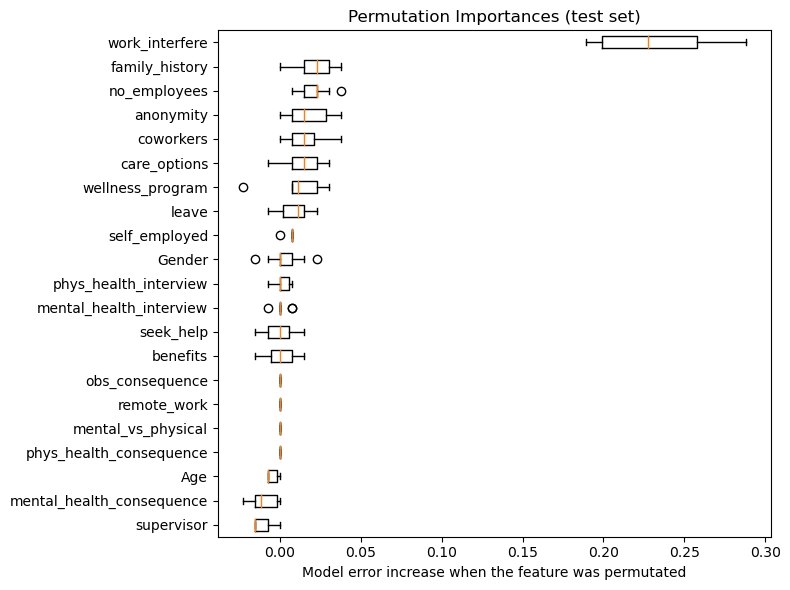

In [37]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model_dict['Logistic Regression'], X_test, y_test, n_repeats=10, random_state=42,
)
result
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
ax.set_xlabel("Model error increase when the feature was permutated")
fig.tight_layout()
plt.show()

Based on the figure above, we can identify three important features: "work_interfere", "family_history", and "no_employees". They respectively represent the assessment of "judgement of the extent to which mental illness may interfere with work", "the presence of a family history of mental illness", and "the number of employees in the company".

In [38]:
columns_to_chart = ["work_interfere", "family_history", "no_employees"]
charts = []
for column in columns_to_chart:
    chart = alt.Chart(train_df).mark_bar(opacity=0.6).encode(
        x=alt.X(column, type='nominal', sort='-y'), 
        y=alt.Y('count()', stack=False),
        color=alt.Color('treatment')
    ).properties(
        height=200,
    )
    charts.append(chart)

combined_chart = alt.hconcat(*charts)
combined_chart.display()


alt.HConcatChart(...)

We dive deeper into these features to see how may they influence the possibility of that an individual should seek for mental health treatment:
- The more the employees sense that mental health problems are interfering with their work, they are more likely to seek/need treatment.
- If an employee has a family history of mental health, they are more likely to seek/need mental health treatment.
- For companies with employee numbers from 25 to 500 and above 1000, their employees are more likely to seek/need treatment.
